## Emergency Vehicles Recognition

In [1]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import cv2   
%matplotlib inline

In [2]:
#assigning directory
train_dir = r'\\adir.hull.ac.uk\home\707\707830\Downloads\archive\Emergency_Vehicles\train' 
test_dir = r'\\adir.hull.ac.uk\home\707\707830\Downloads\archive\Emergency_Vehicles\test' 

In [3]:
image = cv2.imread(r'\\adir.hull.ac.uk\home\707\707830\Downloads\archive\Emergency_Vehicles\train\1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

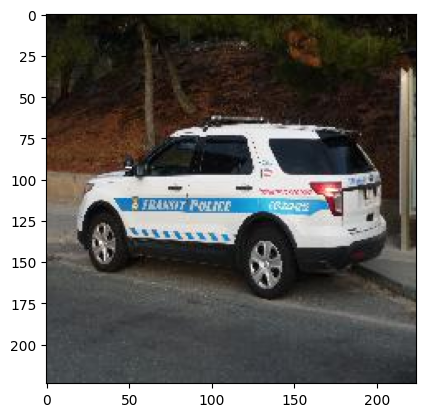

In [4]:
plt.imshow(image)

In [5]:
image.shape # This shows the shape of the image (length, width,chanel) 

(224, 224, 3)

In [6]:
#Preprocessing
from keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generatio

In [7]:
# Here we are applying our desired transformations  
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image  
) 

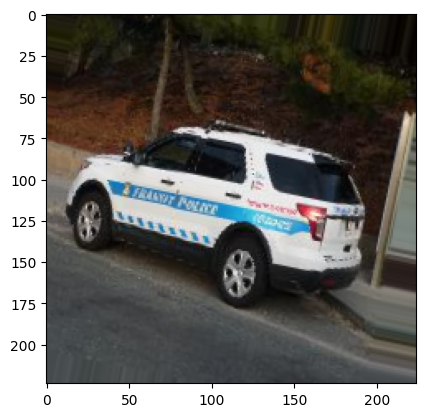

In [8]:

# showing the transformation 
plt.imshow(image_gen.random_transform(image))

In [9]:
train_df=pd.read_csv(r'\\adir.hull.ac.uk\home\707\707830\Downloads\archive\Emergency_Vehicles\train.csv')
test_df=pd.read_csv(r'\\adir.hull.ac.uk\home\707\707830\Downloads\archive\Emergency_Vehicles\test.csv')

In [10]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [11]:
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [13]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50# defines the batch size  
                                             ) 
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size  
                                              )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


#### Constructor Stage

In [20]:
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization 
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
import tensorflow as tf

In [21]:
model = Sequential() 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization()) 
model.add(Flatten()) 
#model.add(Dense(5,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid'))


#### Compilation Stage

In [22]:
op = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits = False)
model.compile(optimizer = op, loss = loss, metrics = ['accuracy'])

In [23]:
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 56, 56, 32)        128       
 chNormalization)                                                
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                      

#### Training stage

In [25]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)

C:\Users\707830\AppData\Local\Temp\ipykernel_15580\2704492499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 2983s 133s/step - loss: 1.3556 - accuracy: 0.6530 - val_loss: 0.8136 - val_accuracy: 0.4355
Epoch 2/10
23/23 [==============================] - 5677s 254s/step - loss: 0.7672 - accuracy: 0.7217 - val_loss: 0.6877 - val_accuracy: 0.5262
Epoch 3/10
23/23 [==============================] - 3414s 149s/step - loss: 0.5932 - accuracy: 0.7348 - val_loss: 0.6562 - val_accuracy: 0.6532
Epoch 4/10
23/23 [==============================] - 263s 8s/step - loss: 0.5062 - accuracy: 0.7617 - val_loss: 0.6268 - val_accuracy: 0.6855
Epoch 5/10
23/23 [==============================] - 67s 3s/step - loss: 0.5106 - accuracy: 0.7609 - val_loss: 0.6216 - val_accuracy: 0.7238
Epoch 6/10
23/23 [==============================] - 54s 2s/step - loss: 0.4906 - accuracy: 0.7826 - val_loss: 0.6103 - val_accuracy: 0.7077
Epoch 7/10
23/23 [==============================] - 55s 2s/step - loss: 0.4760 - accuracy: 0.7826 - val_loss: 0.5971 - val_accuracy: 0.6956
Epoch 8

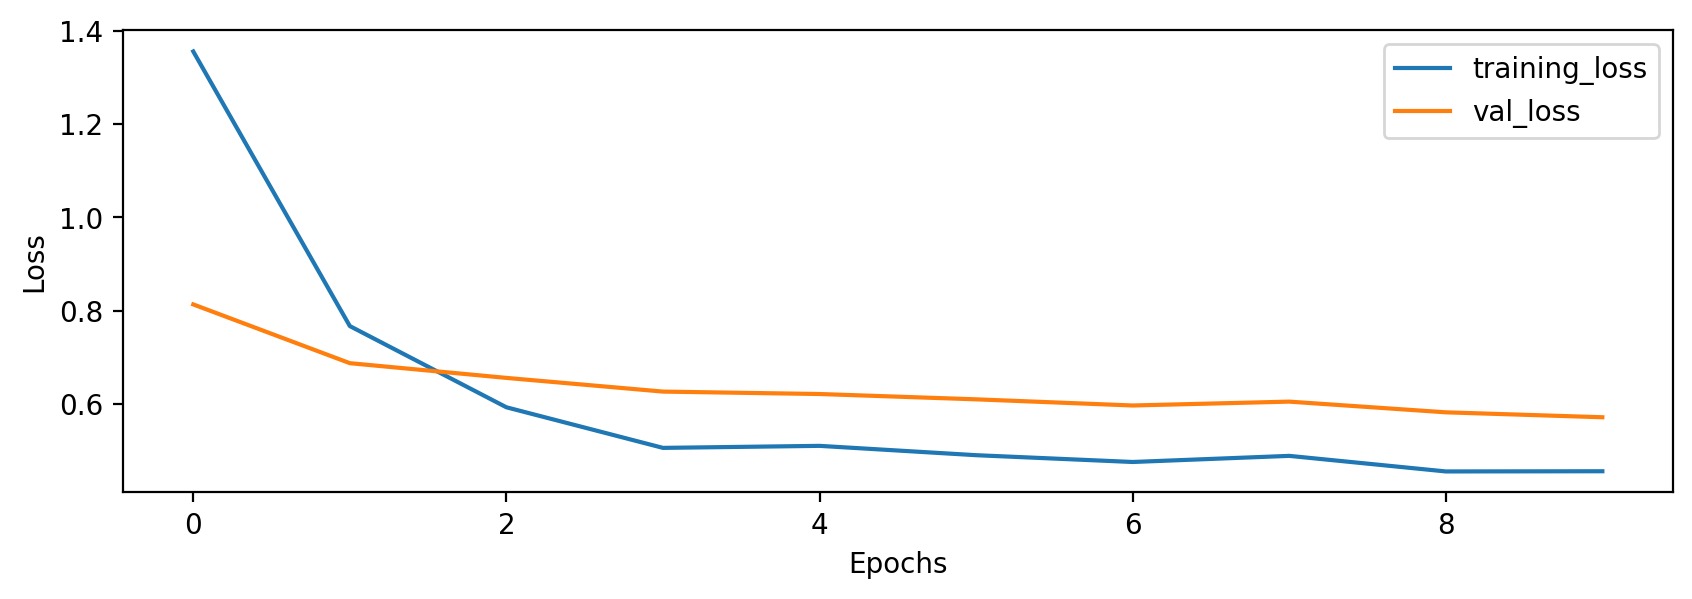

In [26]:

## checking for overfitting  
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

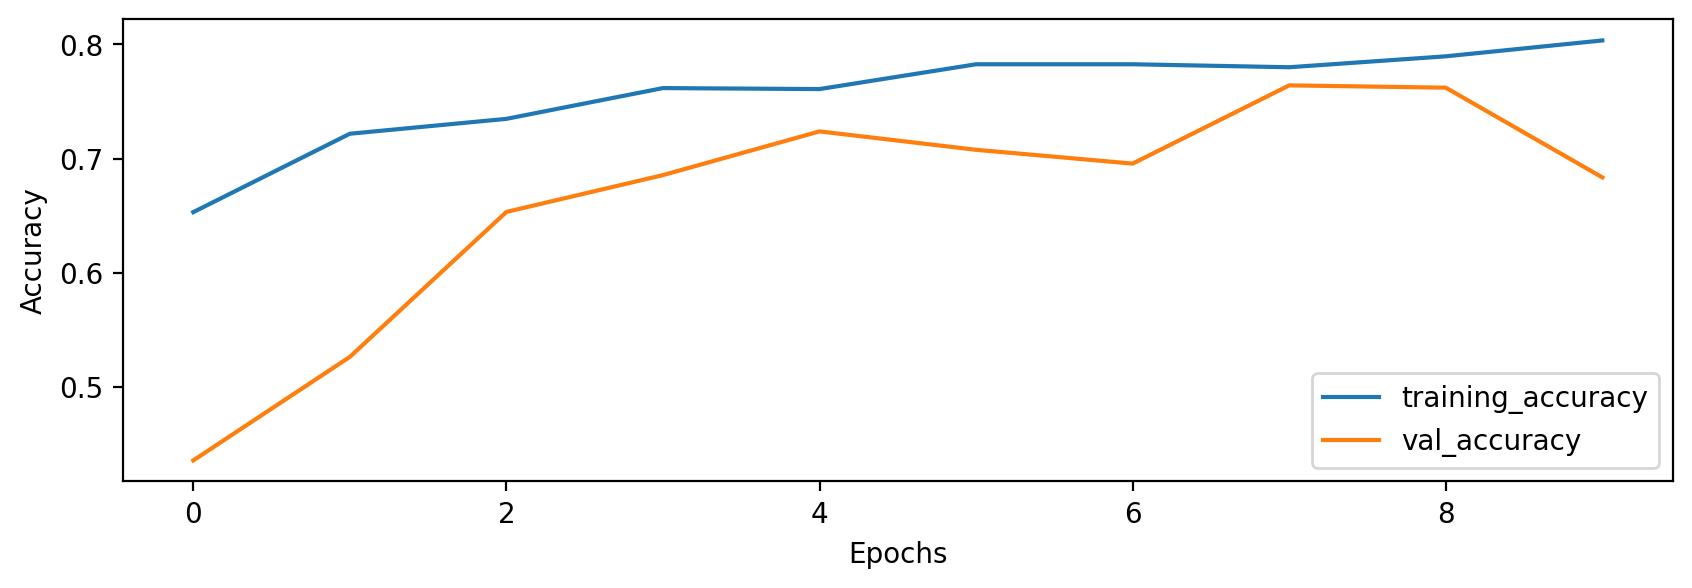

In [27]:
## checking for overfitting  
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['accuracy'], 
        label='training_accuracy') 
plt.plot(history_df['val_accuracy'], 
        label='val_accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
# Predict on the validation set
y_pred = model.predict(validation_generator)

10/10 [==============================] - 880s 89s/step


In [38]:
# Convert the predicted probabilities to class labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int)

In [39]:
# Get the true labels from the validation generator
y_true_labels = validation_generator.labels


In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.58


In [41]:
import seaborn as sns

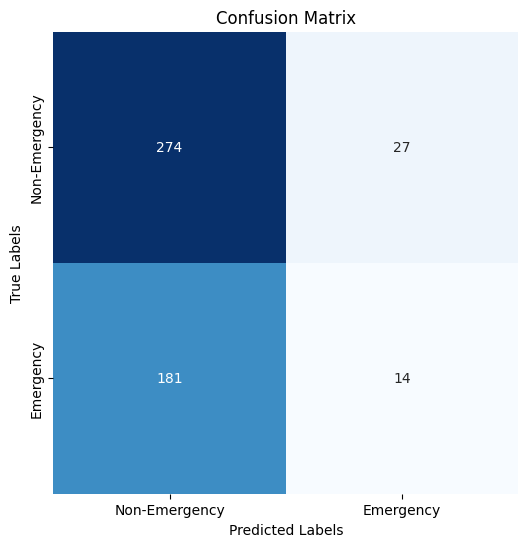

In [42]:
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Emergency', 'Emergency'], yticklabels=['Non-Emergency', 'Emergency'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Calculate and print other performance metrics
report = classification_report(y_true_labels, y_pred_labels, target_names=['Non-Emergency', 'Emergency'])
print("Classification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

Non-Emergency       0.60      0.91      0.72       301
    Emergency       0.34      0.07      0.12       195

     accuracy                           0.58       496
    macro avg       0.47      0.49      0.42       496
 weighted avg       0.50      0.58      0.49       496

